In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pip show numpy


Name: numpy
Version: 1.24.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: c:\users\asus\anaconda3\envs\mlproj\lib\site-packages
Requires: 
Required-by: contourpy, matplotlib, pandas, patsy, scikit-learn, scipy, seaborn, statsmodels, xgboost
Note: you may need to restart the kernel to use updated packages.


In [3]:
df= pd.read_csv("winequality-white.csv",sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


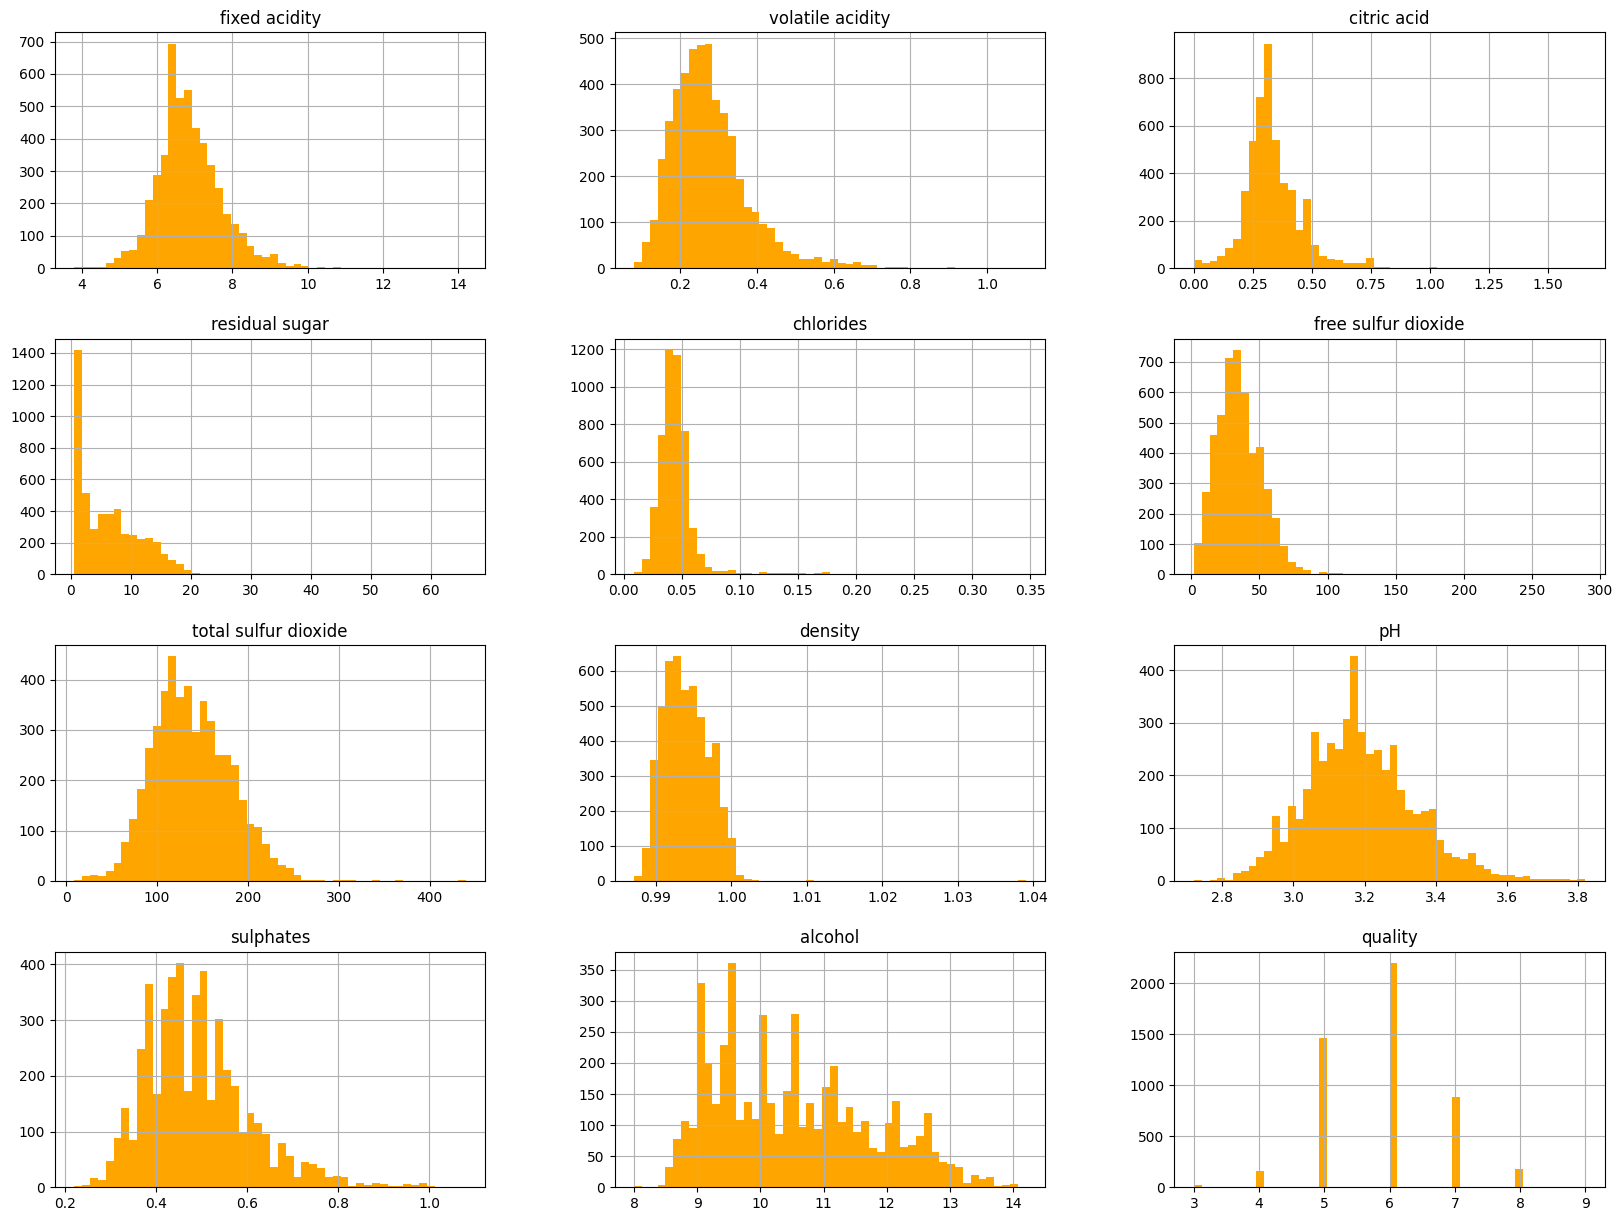

In [8]:
df.hist(bins=50,figsize=(20,15),color = "orange")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X =df.drop(['quality'],axis=1)
y = df.quality

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=10)

In [14]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(3919, 11)
(3919,)
(979, 11)
(979,)


### Using ElasticNet

In [15]:
from sklearn.linear_model import ElasticNet


In [16]:
lr = ElasticNet(alpha=0.1, l1_ratio=0.5,random_state=42)
lr.fit(x_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def eval_metrics(actual,pred):
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    r2 = r2_score(actual,pred)
    return rmse,mae,r2
    

In [20]:
pred_val = lr.predict(x_test)
pred_val

array([6.35780028, 5.63349333, 5.32196434, ..., 5.48748761, 6.33677978,
       5.94887369])

In [21]:
(rmse,mae,r2) = eval_metrics(y_test, pred_val)

In [22]:
print('rmse =',rmse)
print('mae =',mae)
print('r2 =',r2)

rmse = 0.7920879453535645
mae = 0.6220888103409776
r2 = 0.20844202124425182
